# Country search trends

Previously, we measured Americans' expectations about how many casualties occurred during disasters in different countries. But there are many factors that might go into these judgments. Some might be general predictive properties--population, distance from the USA, etc.--but others might be more idiosyncratic--recent conflicts, actual earthquake baserates, etc. Here, we're going to try to identify some general predictors using Google trends data. To figure out good predictors, we're going to see how much countries care about each other as measured by how much they Google each other.

Our measure for how much one Country A cares about Country B is going to be, how much Country A searches for Country B divided by how much Country B searches for Country B. For example, [this search](https://www.google.com/trends/explore#q=%2Fm%2F0f8l9c%2C%20%2Fm%2F09c7w0&geo=US&date=1%2F2005%20133m&cmpt=q&tz=Etc%2FGMT%2B7) is going to allow us to see how much Americans care about the French. If we look at the summary bar graph, we're going to take 5/79. So, rule of thumb, higher scores indicate the country is more searched.

In [1]:
%matplotlib inline

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set(style="white", color_codes=True)

Let's read the raw data into a csv

In [2]:
trends_df=pd.read_csv('country_trends.csv',header=None)
trends_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,NaN,Nigeria,Japan,Pakistan,United States,France,Russia,Indonesia,Mexico,Rwanda,...,Germany,Spain,Thailand,South Africa,India,Australia,Brazil,Canada,Belgium,Netherland
1,Nigeria,68,1,0,14,2,1,0,0,0,...,2,1,0,3,2,2,1,5,1,1
2,Japan,0,66,1,16,3,2,4,3,0,...,2,2,3,2,3,4,8,2,1,1
3,Pakistan,0,1,70,4,0,1,0,0,0,...,1,0,1,0,5,2,0,2,0,0
4,United States,1,6,2,80,5,5,1,14,0,...,5,4,2,2,9,6,8,12,1,1


And now let's turn it into our country caring measure

In [3]:
self_df=pd.DataFrame({'self_num':[int(trends_df.iloc[i,i]) for i in range(1,40)],
 'searcher':[trends_df.iloc[0,i] for i in range(1,40)]})

In [11]:
searcher=[]
searchee=[]
search_num=[]
for s_er in range(1,40):
    for s_ee in range(1,40):
        if s_er!=s_ee:
            searcher.append(trends_df.iloc[s_er,0])
            searchee.append(trends_df.iloc[0,s_ee])        
            search_num.append(int(trends_df.iloc[s_er,s_ee]))
search_df=pd.DataFrame({'searcher':searcher,'searchee':searchee,'search_num':search_num})
search_df=pd.merge(search_df,self_df,how='inner',on='searcher')
search_df.loc[:,'search_score']=search_df.loc[:,'search_num']/search_df.loc[:,'self_num']

Ok, first analysis--What countries were searched the most?

In [12]:
mean_searchee=search_df.loc[:,['searchee','search_score']].groupby('searchee').mean().reset_index()
mean_searchee.columns=['searchee', 'mean']
std_searchee=search_df.loc[:,['searchee','search_score']].groupby('searchee').std()
num_search=np.sqrt(search_df.loc[:,['searchee','search_score']].groupby('searchee').size())
sem_searchee=std_searchee.divide(num_search,axis=0).reset_index()
sem_searchee.columns=['searchee', 'SEM']

searchee_df=pd.merge(mean_searchee,sem_searchee,how='inner',on='searchee')
searchee_df=searchee_df.sort_values(by='mean').reset_index()

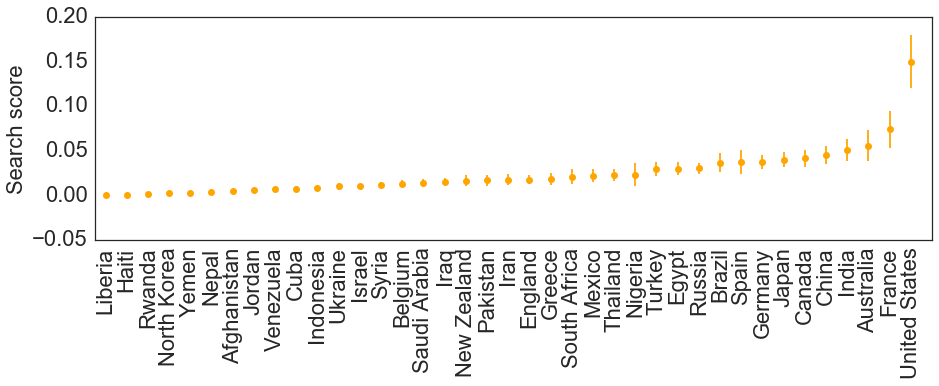

In [13]:
plt.figure(figsize=(15,4))

plt.errorbar(range(len(searchee_df)), searchee_df['mean'], yerr=searchee_df['SEM'],c='orange',fmt='o')
plt.ylabel('Search score',fontsize='22')

plt.xticks(range(len(searchee_df)), searchee_df['searchee'], rotation='90',fontsize=22)
plt.yticks(fontsize=22)
plt.axis([-.5, len(searchee_df), -.05, .2])
plt.show()